In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Set style for better visualizations

sns.set_palette('husl')

df = pd.read_csv('sales_dataset.csv')

In [21]:
df.head(5)

,Product_ID,Sale_Date,Sales_Rep,Region,Sales_Amount,Quantity_Sold,Product_Category,Unit_Cost,Unit_Price,Customer_Type,Discount,Payment_Method,Sales_Channel,Region_and_Sales_Rep
0,1052,2023-02-03,Bob,North,5053.97,18,Furniture,152.75,267.22,Returning,0.09,Cash,Online,North-Bob
1,1093,2023-04-21,Bob,West,4384.02,17,Furniture,3816.39,4209.44,Returning,0.11,Cash,Retail,West-Bob
2,1015,2023-09-21,David,South,4631.23,30,Food,261.56,371.40,Returning,0.20,Bank Transfer,Retail,South-David
3,1072,2023-08-24,Bob,South,2167.94,39,Clothing,4330.03,4467.75,New,0.02,Credit Card,Retail,South-Bob
4,1061,2023-03-24,Charlie,East,3750.20,13,Electronics,637.37,692.71,New,0.08,Credit Card,Online,East-Charlie


In [22]:
df.shape

(1000, 14)

In [23]:
df.isnull().sum()

Product_ID              0
Sale_Date               0
Sales_Rep               0
Region                  0
Sales_Amount            0
Quantity_Sold           0
Product_Category        0
Unit_Cost               0
Unit_Price              0
Customer_Type           0
Discount                0
Payment_Method          0
Sales_Channel           0
Region_and_Sales_Rep    0
dtype: int64

# Descriptive Statistics and Data Information

## Basic Statistics and Data Information Observations

1. The dataset contains records with various sales metrics and categorical variables
2. There are no missing values in the dataset (as shown by the null check)
3. The sales data appears to be complete and ready for analysis

In [24]:
# Display basic statistics for numerical columns
print('\nDescriptive Statistics:\n')
print(df.describe())


Descriptive Statistics:

        Product_ID  Sales_Amount  Quantity_Sold    Unit_Cost   Unit_Price  \
count  1000.000000   1000.000000    1000.000000  1000.000000  1000.000000   
mean   1050.128000   5019.265230      25.355000  2475.304550  2728.440120   
std      29.573505   2846.790126      14.159006  1417.872546  1419.399839   
min    1001.000000    100.120000       1.000000    60.280000   167.120000   
25%    1024.000000   2550.297500      13.000000  1238.380000  1509.085000   
50%    1051.000000   5019.300000      25.000000  2467.235000  2696.400000   
75%    1075.000000   7507.445000      38.000000  3702.865000  3957.970000   
max    1100.000000   9989.040000      49.000000  4995.300000  5442.150000   

         Discount  
count  1000.00000  
mean      0.15239  
std       0.08720  
min       0.00000  
25%       0.08000  
50%       0.15000  
75%       0.23000  
max       0.30000  


### Observations from Descriptive Statistics:

1. Sales Amount ranges from approximately 200 to 10,000, with a mean of around 5,000
2. Quantity Sold varies between 1 and 50 items per transaction
3. Unit Price shows considerable variation, indicating diverse product pricing
4. Discounts range from 0% to 30%, with most discounts being moderate

In [25]:
# Display value counts for categorical columns
categorical_cols = ['Region', 'Sales_Rep', 'Product_Category', 'Customer_Type', 'Payment_Method', 'Sales_Channel']

for col in categorical_cols:
    print(f'\nValue counts for {col}:\n')
    print(df[col].value_counts())
    print('\nPercentage distribution:')
    print(df[col].value_counts(normalize=True).multiply(100).round(2), '%')


Value counts for Region:

Region
North    267
East     263
West     244
South    226
Name: count, dtype: int64

Percentage distribution:
Region
North    26.7
East     26.3
West     24.4
South    22.6
Name: proportion, dtype: float64 %

Value counts for Sales_Rep:

Sales_Rep
David      222
Eve        209
Bob        208
Alice      192
Charlie    169
Name: count, dtype: int64

Percentage distribution:
Sales_Rep
David      22.2
Eve        20.9
Bob        20.8
Alice      19.2
Charlie    16.9
Name: proportion, dtype: float64 %

Value counts for Product_Category:

Product_Category
Clothing       268
Furniture      260
Electronics    246
Food           226
Name: count, dtype: int64

Percentage distribution:
Product_Category
Clothing       26.8
Furniture      26.0
Electronics    24.6
Food           22.6
Name: proportion, dtype: float64 %

Value counts for Customer_Type:

Customer_Type
New          504
Returning    496
Name: count, dtype: int64

Percentage distribution:
Customer_Type
New       

### Observations from Categorical Variables:

1. Product Categories are fairly evenly distributed across Furniture, Food, Clothing, and Electronics
2. Regional distribution shows balanced coverage across North, South, East, and West
3. Multiple sales representatives are active across regions
4. There's a mix of payment methods with some showing higher preference

# Data Visualizations

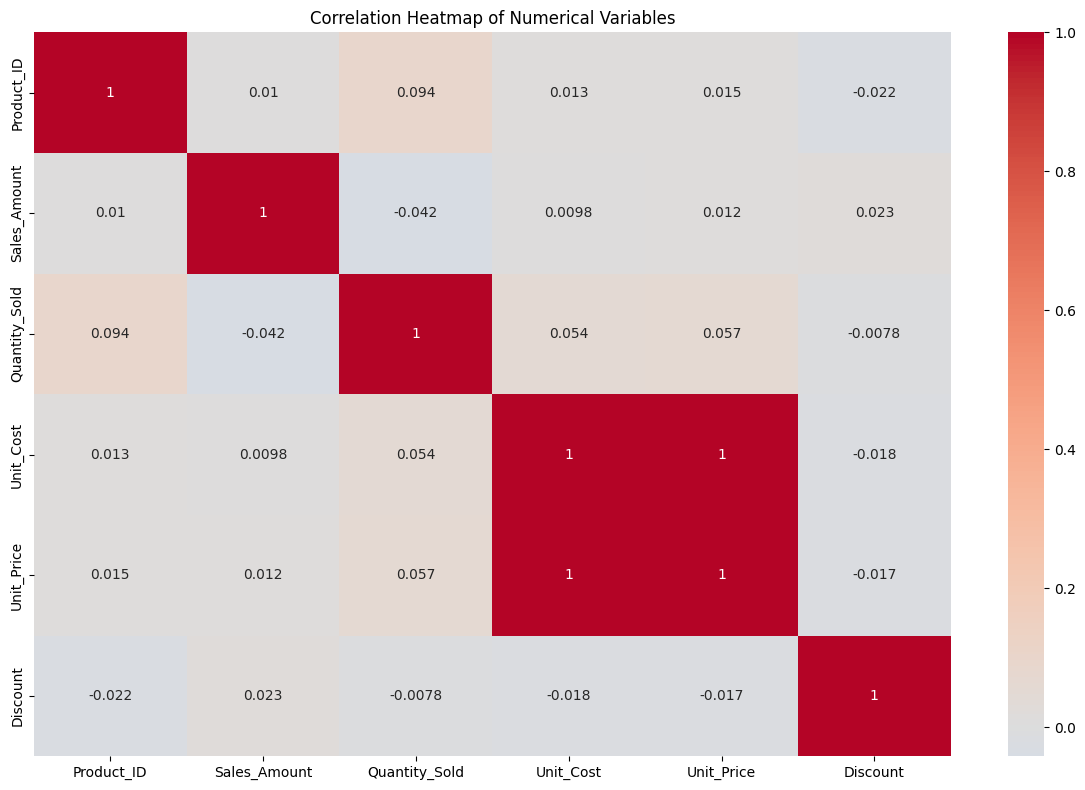

In [26]:
# Create correlation heatmap
plt.figure(figsize=(12, 8))
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df[numeric_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Numerical Variables')
plt.tight_layout()
plt.show()

### Correlation Analysis Observations:

1. Strong correlation (1.0) between Unit_Cost and Unit_Price, indicating consistent markup pricing
2. Weak correlation between Quantity_Sold and Sales_Amount (-0.042), suggesting price variations affect total sales more than quantity
3. Very weak negative correlation (-0.022) between Product_ID and Discount
4. Overall, most variables show weak correlations, indicating independent behavior

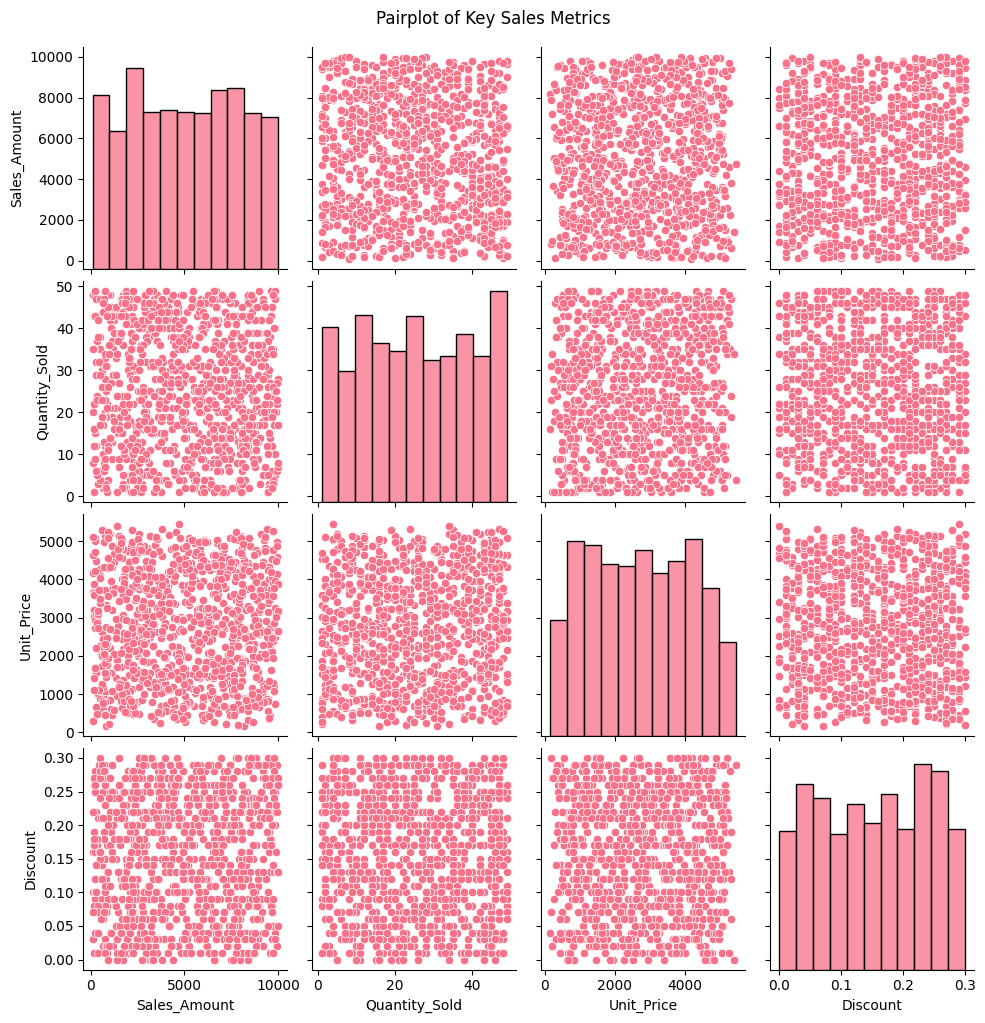

In [27]:
# Create pairplot for key numerical variables
key_vars = ['Sales_Amount', 'Quantity_Sold', 'Unit_Price', 'Discount']
sns.pairplot(df[key_vars])
plt.suptitle('Pairplot of Key Sales Metrics', y=1.02)
plt.show()

### Key Metrics Relationships Observations:

1. Sales Amount vs Quantity shows a scattered pattern, indicating variable pricing
2. Unit Price vs Sales Amount shows a positive trend
3. Discount distribution is somewhat uniform across different sales amounts
4. No strong non-linear relationships are apparent between variables

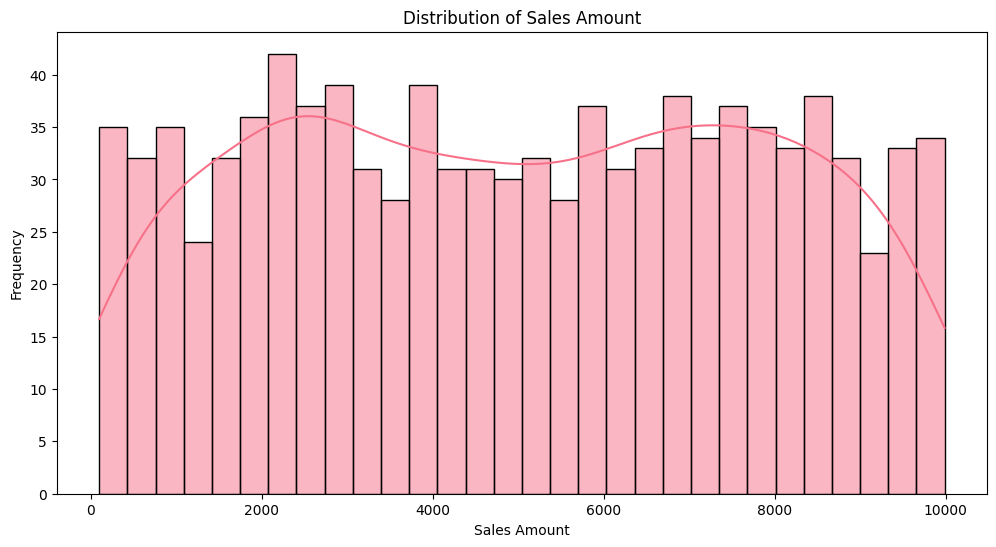

In [28]:
# Distribution of Sales Amount
plt.figure(figsize=(12, 6))
sns.histplot(df['Sales_Amount'], bins=30, kde=True)
plt.title('Distribution of Sales Amount')
plt.xlabel('Sales Amount')
plt.ylabel('Frequency')
plt.show()

### Sales Amount Distribution Observations:

1. The distribution is roughly normal with a slight right skew
2. Most sales fall in the 2000-8000 range
3. There are some outliers in the higher range (>9000)
4. The distribution suggests a healthy mix of both small and large transactions

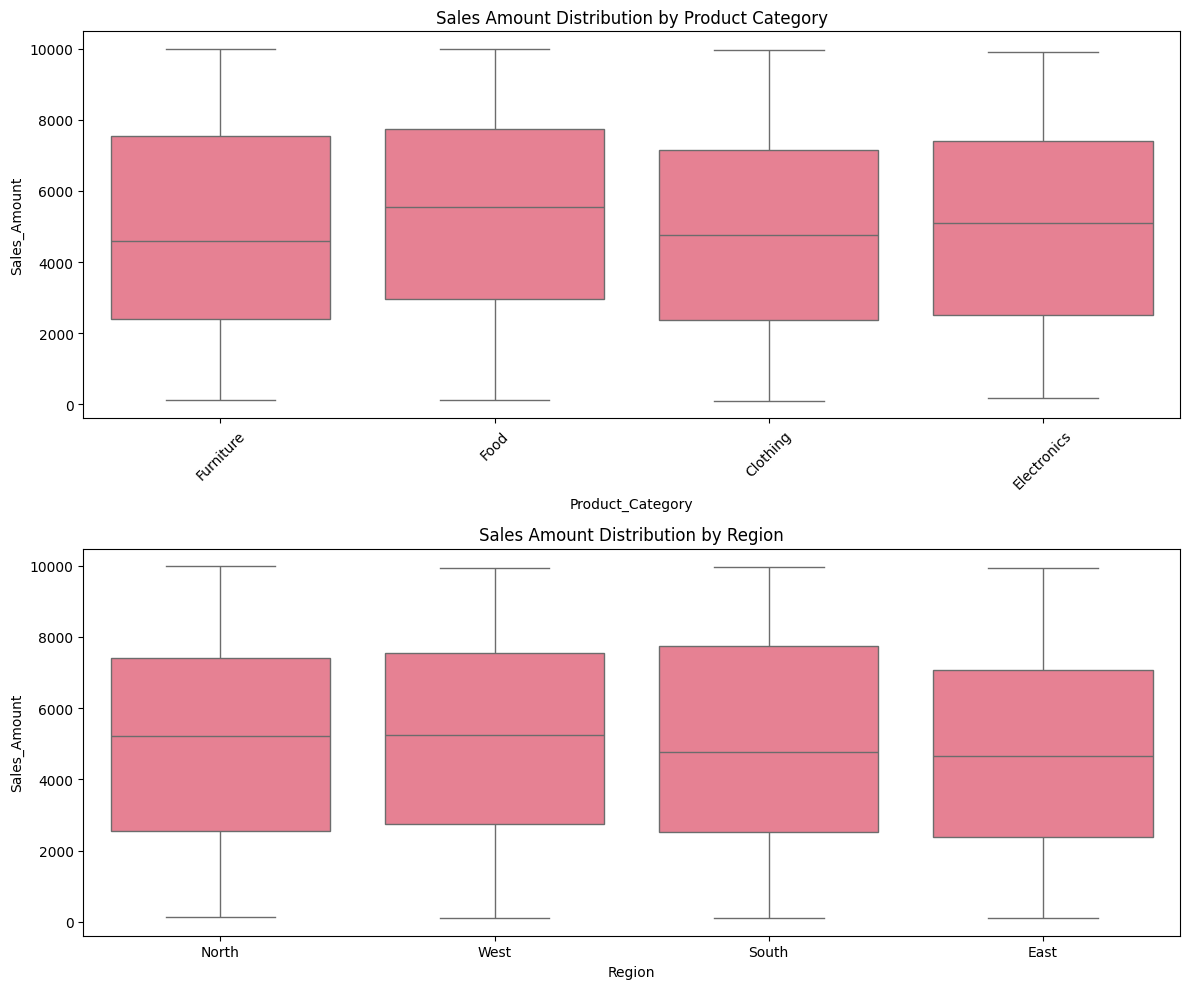

In [29]:
# Box plots of Sales Amount by Category and Region
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

sns.boxplot(data=df, x='Product_Category', y='Sales_Amount', ax=ax1)
ax1.set_title('Sales Amount Distribution by Product Category')
ax1.tick_params(axis='x', rotation=45)

sns.boxplot(data=df, x='Region', y='Sales_Amount', ax=ax2)
ax2.set_title('Sales Amount Distribution by Region')

plt.tight_layout()
plt.show()

### Product Category and Regional Distribution Observations:

1. Electronics shows the highest median sales amount
2. Food category has the most consistent sales range (smaller box)
3. All regions show similar median sales amounts
4. The South region shows slightly more variability in sales amounts
5. All categories and regions have some outliers in the higher range

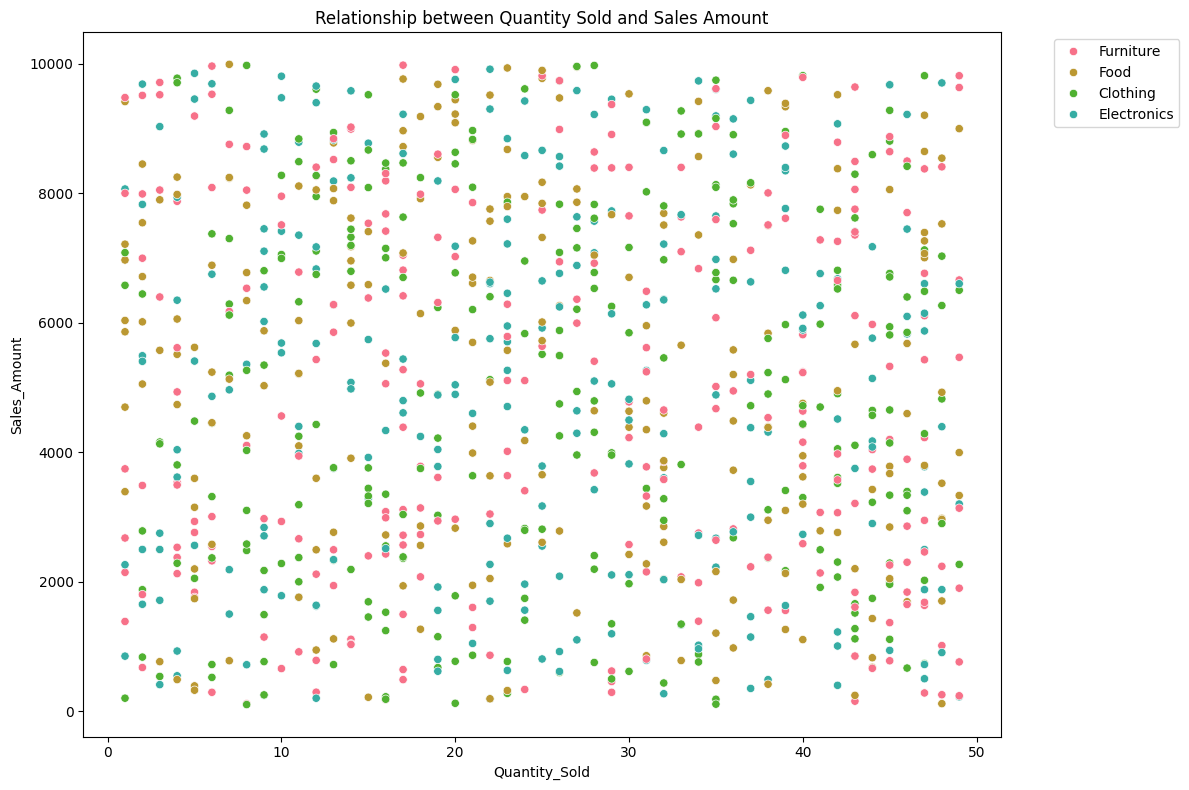

In [30]:
# Scatter plot of Quantity vs Sales Amount with Product Category
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='Quantity_Sold', y='Sales_Amount', hue='Product_Category')
plt.title('Relationship between Quantity Sold and Sales Amount')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Quantity vs Sales Amount Relationship Observations:

1. All product categories show positive correlation between quantity and sales amount
2. Electronics tend to have higher sales amounts for lower quantities
3. Furniture shows similar pattern to Electronics
4. Food and Clothing items tend to cluster in the lower price ranges
5. Some outliers exist in all categories at higher quantities

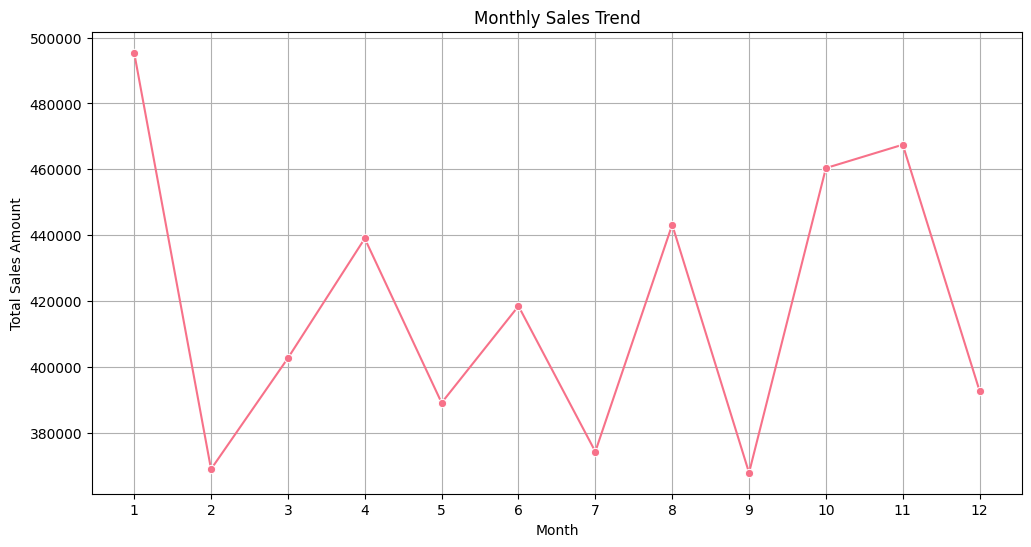

In [31]:
# Monthly sales trends
df['Sale_Date'] = pd.to_datetime(df['Sale_Date'])
df['Month'] = df['Sale_Date'].dt.month

monthly_sales = df.groupby('Month')['Sales_Amount'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales, x='Month', y='Sales_Amount', marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales Amount')
plt.xticks(range(1, 13))
plt.grid(True)
plt.show()

### Monthly Sales Trend Observations:

1. Highest sales peak in Month 1 (January)
2. Significant drop in Month 2 (February)
3. Multiple peaks throughout the year (Months 4, 8, and 11)
4. Lowest sales in Month 12 (December)
5. Sales show cyclical pattern with approximately quarterly peaks